In [12]:
from mlrose_hiive import NeuralNetwork
from sklearn.metrics import accuracy_score
import csv
import pandas as pd
import time
import numpy as np
import json

In [29]:
def run_neural_network_rhc(X_train, y_train, X_test, y_test):
    hidden_nodes = [100, 50, 100]
    result = {}
    for restart in [0, 2, 5, 7, 10]:
        print("REST", restart)
        start = time.time()
        model = NeuralNetwork(hidden_nodes=hidden_nodes, restarts=restart, algorithm='random_hill_climb'
                              , max_iters=4000, curve=True, random_state=7)
        model.fit(X_train, y_train)
        end = time.time()
        y_act = model.predict(X_test)
        result[restart] = {
            'loss': model.loss, 
            'time': end-start,
            'accuracy': accuracy_score(y_act, y_test),
            'curve': model.fitness_curve.tolist()
        }

    with open('RHC.json', "w+") as f:
        json.dump(result, f, indent=4)

In [31]:
from scipy.io.arff import loadarff 
from sklearn.model_selection import train_test_split

raw_data = loadarff('Training Dataset.arff')
ph_data = pd.DataFrame(raw_data[0])

for var in ph_data.columns.values:
    ph_data[var] = pd.Categorical(ph_data[var])
    ph_data[var] = ph_data[var].cat.codes


y = ph_data.Result.values
X = ph_data.drop(['Result'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

run_neural_network_rhc(X_train, y_train, X_test, y_test)

REST 0
REST 2
REST 5
REST 7
REST 10


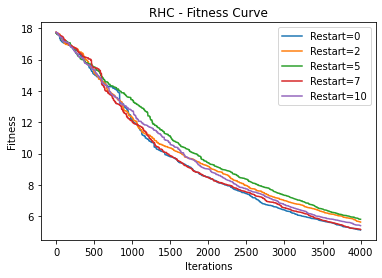

In [37]:
import matplotlib.pyplot as plt

results = None        
with open("RHC.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("RHC - Fitness Curve")
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")
for restart, stats in results.items():
    ax.plot(stats['curve'], label="Restart={}".format(restart))

plt.savefig("RA_Curve.png")
plt.legend(loc="best")

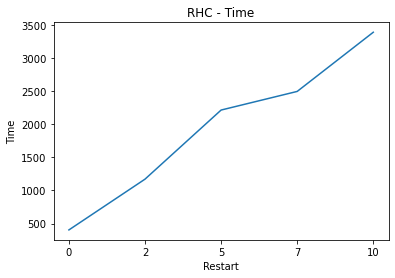

In [38]:
results = None        
with open("RHC.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("RHC - Time")
ax.set_xlabel("Restart")
ax.set_ylabel("Time")
restarts = []
times = []
for restart, stats in results.items():
    restarts.append(restart)
    times.append(stats['time'])    
ax.plot(restarts, times)

plt.savefig("RHC_Curve_time.png")

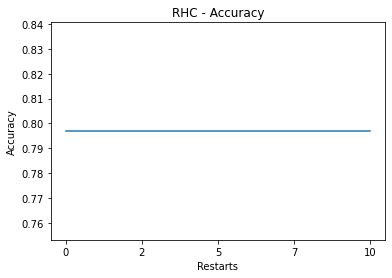

In [40]:
results = None        
with open("RHC.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("RHC - Accuracy")
ax.set_xlabel("Restarts")
ax.set_ylabel("Accuracy")
restarts = []
times = []
for restart, stats in results.items():
    restarts.append(restart)
    times.append(stats['accuracy'])    
ax.plot(restarts, times)

plt.savefig("RHC_Curve_acc.png")

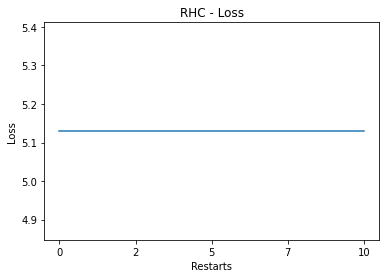

In [36]:
results = None        
with open("RHC.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("RHC - Loss")
ax.set_xlabel("Restarts")
ax.set_ylabel("Loss")
decays = []
times = []
for decay, stats in results.items():
    decays.append(decay)
    times.append(stats['loss'])    
ax.plot(decays, times)

plt.savefig("RHC_Curve_loss.png")